### Import required libraries -

In [80]:
import librosa
import glob 
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import tensorflow.keras
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import os

### Import the testing data (wav file) -

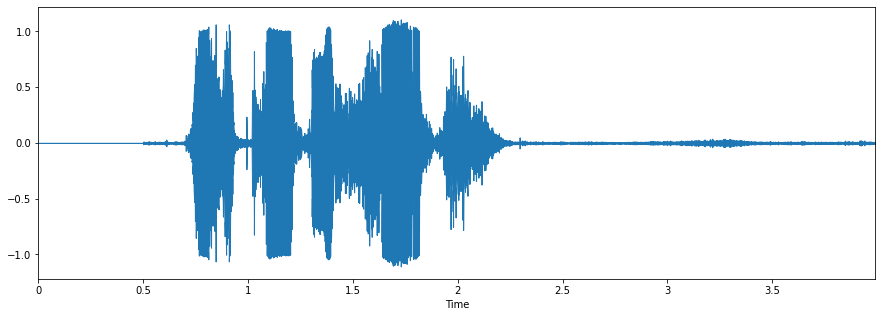

In [81]:
data, sampling_rate = librosa.load('/content/output10.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

### Load the trained model -

In [82]:

# Import the model from the h5 file
# loaded_model = load_model('/content/Emotion_Voice_Detection_Model.h5')
# loaded_model.summary()

# loading json and creating model
from tensorflow.keras.models import model_from_json
with open('/content/model.json', 'r') as json_file:
  loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/Emotion_Voice_Detection_Model.h5")

opt = RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print("Loaded model from disk")

Loaded model from disk


### Read and prepare audio data from the file -

In [83]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('/content/output10.wav', res_type='kaiser_fast', duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = pd.DataFrame(data=featurelive)
livedf2 = livedf2.stack().to_frame().T

print(livedf2)

         0          1          2    ...        213        214        215
           0          0          0  ...          0          0          0
0 -18.203562 -21.471832 -22.522209  ... -22.579805 -22.314659 -21.552433

[1 rows x 216 columns]


### Make a prediction -

In [84]:
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
livepreds

1/1 [==============================] - 0s 113ms/step


array([[9.24087871e-22, 0.00000000e+00, 3.62410527e-26, 1.30689175e-36,
        4.47260830e-28, 1.00000000e+00, 1.80201516e-30, 2.76888791e-27,
        3.62224449e-23, 1.67395368e-11]], dtype=float32)

### Convert the prediction into a readable format -

In [85]:
prediction_classes = ["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"]

livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
print(f"Predicted emotion: {prediction_classes[liveabc[0]]}")

Predicted emotion: male_angry
